Task 2: Car Price Prediction Model Using Machine Learning
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning.

My Objectives for this project:
1. Preprocess and clean the dataset.
2. Analyze the relationships between features and the selling price.
3. Train and evaluate machine learning models to predict car prices.

In [1]:
import pandas as pd
file_path = 'C:\\Users\\User\\OneDrive\\Desktop\\ALISHBA\\extra-curiculums\\oasis_infobyte_offerLetter\\task2\\car data.csv'
car_data = pd.read_csv(file_path)
car_data.head(), car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


(  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
 0     ritz  2014           3.35           5.59       27000    Petrol   
 1      sx4  2013           4.75           9.54       43000    Diesel   
 2     ciaz  2017           7.25           9.85        6900    Petrol   
 3  wagon r  2011           2.85           4.15        5200    Petrol   
 4    swift  2014           4.60           6.87       42450    Diesel   
 
   Selling_type Transmission  Owner  
 0       Dealer       Manual      0  
 1       Dealer       Manual      0  
 2       Dealer       Manual      0  
 3       Dealer       Manual      0  
 4       Dealer       Manual      0  ,
 None)

As you can see, The dataset contains 301 entries and 9 columns, with no missing values. 
Here are the columns:

1. Car_Name: The name of the car.
2. Year: The year the car was purchased.
3. Selling_Price: The price at which the car is being sold (target variable).
4. Present_Price: The current price of the car.
5. Driven_kms: The distance the car has driven.
6. Fuel_Type: Type of fuel used by the car (Petrol/Diesel).
7. Selling_type: Whether the seller is a dealer or individual.
8. Transmission: Type of transmission (Manual/Automatic).
9. Owner: Number of previous owners.

To preprocess the data, I need to:
1. Encode categorical variables like Fuel_Type, Selling_type, and Transmission.
2. Drop unnecessary columns such as Car_Name if it's not useful for the model.
3. Normalize or scale numerical features if required.

In [2]:
from sklearn.preprocessing import OneHotEncoder

car_data_preprocessed = car_data.drop('Car_Name', axis=1)
car_data_preprocessed = pd.get_dummies(car_data_preprocessed, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)
car_data_preprocessed.head()


,Year,Selling_Price,Present_Price,Driven_kms,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


Now i will do some Exploratory Data Analysis (EDA) for Correlation Analysis,Feature Distribution and to examine Feature Relationships.

In [3]:
print(car_data_preprocessed.dtypes)
non_numeric_columns = car_data_preprocessed.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)
for column in non_numeric_columns:
     print(f"Unique values in {column}:", car_data_preprocessed[column].unique())
car_data_preprocessed = pd.get_dummies(car_data.drop('Car_Name', axis=1), drop_first=True)


Year                         int64
Selling_Price              float64
Present_Price              float64
Driven_kms                   int64
Owner                        int64
Fuel_Type_Diesel              bool
Fuel_Type_Petrol              bool
Selling_type_Individual       bool
Transmission_Manual           bool
dtype: object
Non-numeric columns: Index([], dtype='object')


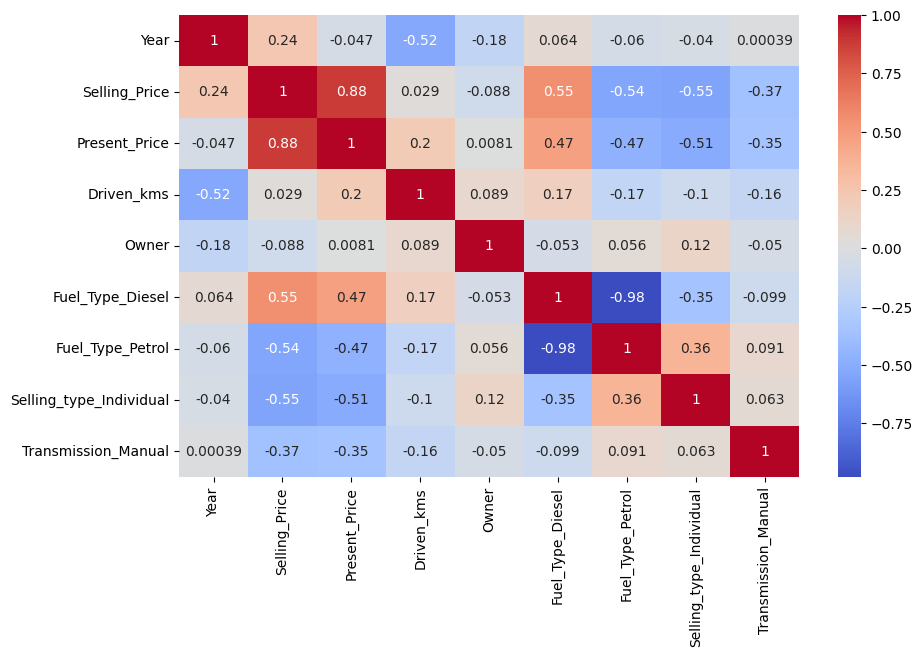

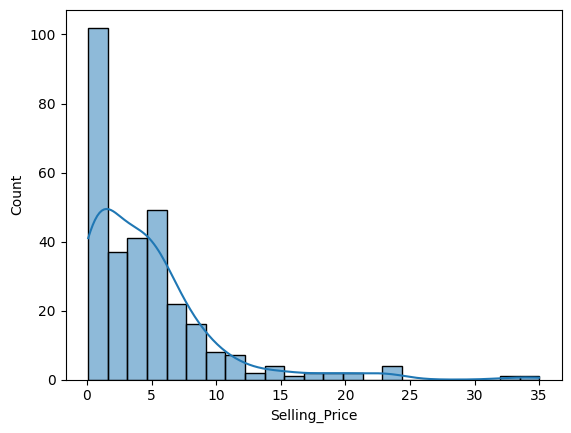

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#corelation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(car_data_preprocessed.corr(), annot=True, cmap='coolwarm')
plt.show()
# distribution of Selling_Price
sns.histplot(car_data_preprocessed['Selling_Price'], kde=True)
plt.show()


Next, we will Split the dataset into training and testing sets. Usually, an 80-20 split works well.

In [5]:
from sklearn.model_selection import train_test_split

X = car_data_preprocessed.drop('Selling_Price', axis=1)
y = car_data_preprocessed['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"R-squared: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")


R-squared: 0.8488707839193601
MAE: 1.216374019332988
